# Katabatic Demo Usage

#### Importing Dependenciencies

In [1]:
# !pip install -U scikit-learn

In [2]:
# !pip install pyitlib

In [3]:
# !pip install tensorflow

In [4]:
# !pip install pgmpy

In [5]:
# !pip install sdv

#### Importing Katabatic

In [2]:
from katabatic.katabatic import Katabatic
import numpy as np
import pandas as pd

Sample Training Data

In [3]:
medgan_model = Katabatic.run_model('medgan')

--------------------------
module name:    katabatic.katabatic
parent process: 69249
process id:     15244
katabatic.models.medgan.medgan_adapter
katabatic.models.medgan.medgan_adapter


2024-08-30 17:24:03.506848: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<module 'katabatic.models.medgan.medgan_adapter' from '/Users/abdullah/Documents/GitHub/Katabatic/katabatic/models/medgan/medgan_adapter.py'>


In [4]:
file_path = "/Users/abdullah/Documents/GitHub/Katabatic/katabatic/nursery/nursery.data"

# Column names as per the dataset's description
columns = [
    "parents", "has_nurs", "form", "children", "housing",
    "finance", "social", "health", "class"
]

# Load the dataset into a pandas DataFrame
data = pd.read_csv(file_path, header=None, names=columns)

# Display the first few rows of the dataset
print(data.head())

  parents has_nurs      form children     housing     finance         social  \
0   usual   proper  complete        1  convenient  convenient        nonprob   
1   usual   proper  complete        1  convenient  convenient        nonprob   
2   usual   proper  complete        1  convenient  convenient        nonprob   
3   usual   proper  complete        1  convenient  convenient  slightly_prob   
4   usual   proper  complete        1  convenient  convenient  slightly_prob   

        health      class  
0  recommended  recommend  
1     priority   priority  
2    not_recom  not_recom  
3  recommended  recommend  
4     priority   priority  


In [5]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [6]:
medgan_model.load_model()

medgan_model.fit(X,y, epochs=20)

[INFO] Initializing MedGAN Model
[INFO] Preprocessing and training MedGAN model
[INFO] Preprocessing data...
[SUCCESS] Data preprocessing completed.
[INFO] Data shape: (12960, 8)
[INFO] Encoded data shape: (12960, 8)
[INFO] TrainX shape: (11664, 8), ValidX shape: (1296, 8)
Pretraining autoencoder...
[INFO] Autoencoder input shape: (None, 8)
[INFO] Encoded layer shape: (None, 128)
[INFO] Decoded output shape: (None, 8)
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - loss: -1.2586
Training GAN...
[INFO] Generator InputLayer shape: (128,)
[INFO] After Generator Dense layer 0, shape: 128
[INFO] After Generator Dense layer 1, shape: 128
[INFO] Generator output shape: 8
[INFO] Generator model summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,056 (133.03 KB)

 Trainable params: 34,056 (133.03 KB)

 Non-trainable params: 0 (0.00 B)

[INFO] Discriminator InputLayer shape: (8,)
[INFO] After Discriminator Dense layer 0, shape: 256
[INFO] After Discriminator Dense layer 1, shape: 128
[INFO] Discriminator output shape: 1
[INFO] Discriminator model summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,329 (138.00 KB)

 Trainable params: 35,329 (138.00 KB)

 Non-trainable params: 0 (0.00 B)

[INFO] GAN model summary:


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 8)              │        34,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 1)              │        35,329 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,385 (271.04 KB)

 Trainable params: 34,056 (133.03 KB)

 Non-trainable params: 35,329 (138.00 KB)

365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step
[INFO] Generated data shape: (11664, 8)
[ERROR] TypeError during logging: unsupported format string passed to list.__format__
[DEBUG] d_loss_real: [array(0.8183685, dtype=float32), array(0.04972565, dtype=float32)], d_loss_fake: [array(0.74627894, dtype=float32), array(0.37804356, dtype=float32)], g_loss: [array(0.74627894, dtype=float32), array(0.74627894, dtype=float32), array(0.37804356, dtype=float32)]
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step
[INFO] Generated data shape: (11664, 8)
[ERROR] TypeError during logging: unsupported format string passed to list.__format__
[DEBUG] d_loss_real: [array(0.7703088, dtype=float32), array(0.26860425, dtype=float32)], d_loss_fake: [array(0.753547, dtype=float32), array(0.29218107, dtype=float32)], g_loss: [array(0.753547, dtype=float32), array(0.753547, dtype=float32), array(0.29218107, dtype=float32)]
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step
[INFO] Generated data shape: (11664, 8)
[ERROR] TypeError

In [7]:
medgan_synthetic = medgan_model.generate(size=len(data))

[INFO] Generating data using MedGAN model
[INFO] Generated samples shape: (12960, 8)
[INFO] Post-processing generated data...
[SUCCESS] Data post-processing completed.
[SUCCESS] Data generation completed


In [8]:
medgan_synthetic = pd.DataFrame(medgan_synthetic)

In [9]:
X_synthetic_ganblr, y_synthetic_ganblr = medgan_synthetic.iloc[:, :-1], medgan_synthetic.iloc[:, -1]

In [10]:
X_synthetic_ganblr

,parents,has_nurs,form,children,housing,finance,social
0,great_pret,critical,complete,1,convenient,convenient,nonprob
1,great_pret,critical,complete,1,convenient,convenient,nonprob
2,great_pret,critical,complete,1,convenient,convenient,nonprob
3,great_pret,critical,complete,1,convenient,convenient,nonprob
4,great_pret,critical,complete,1,convenient,convenient,nonprob
...,...,...,...,...,...,...,...
12955,great_pret,critical,complete,1,convenient,convenient,nonprob
12956,great_pret,critical,complete,1,convenient,convenient,nonprob
12957,great_pret,critical,complete,1,convenient,convenient,nonprob
12958,great_pret,critical,complete,1,convenient,convenient,nonprob


In [11]:
X

,parents,has_nurs,form,children,housing,finance,social,health
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended
1,usual,proper,complete,1,convenient,convenient,nonprob,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority
...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority


In [13]:
y_synthetic_ganblr.unique()

array(['not_recom'], dtype=object)

In [35]:
X = X.drop('health',axis=1)

In [18]:
rm = pd.DataFrame(columns=["Metric", "Value"])

In [19]:
from katabatic.utils import evaluate
import pandas as pd

In [36]:
X

,parents,has_nurs,form,children,housing,finance,social
0,usual,proper,complete,1,convenient,convenient,nonprob
1,usual,proper,complete,1,convenient,convenient,nonprob
2,usual,proper,complete,1,convenient,convenient,nonprob
3,usual,proper,complete,1,convenient,convenient,slightly_prob
4,usual,proper,complete,1,convenient,convenient,slightly_prob
...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob
12957,great_pret,very_crit,foster,more,critical,inconv,problematic
12958,great_pret,very_crit,foster,more,critical,inconv,problematic


In [37]:
tstr_logreg = evaluate.run_metric("tstr_logreg")

print(tstr_logreg.evaluate(X_synthetic_ganblr, y_synthetic_ganblr, X, y))

ValueError: y contains previously unseen labels: 'spec_prior'

In [21]:
# Append the result to the results DataFrame
rm = pd.concat([rm, pd.DataFrame({"Metric": ['tstr_logreg'], "Value": [evaluate.run_metric('tstr_logreg').evaluate(X_synthetic_ganblr, y_synthetic_ganblr, X, y)]})], ignore_index=True,)

# Append the result to the results DataFrame
rg = pd.concat([rm, pd.DataFrame({"Metric": ['tstr_mlp'], "Value": [evaluate.run_metric('tstr_mlp').evaluate(X_synthetic_ganblr, y_synthetic_ganblr, X, y)]})], ignore_index=True,)

# Append the result to the results DataFrame
rg = pd.concat([rm, pd.DataFrame({"Metric": ['tstr_rf'], "Value": [evaluate.run_metric('tstr_rf').evaluate(X_synthetic_ganblr, y_synthetic_ganblr, X, y)]})], ignore_index=True,)

# Append the result to the results DataFrame
rg = pd.concat([rm, pd.DataFrame({"Metric": ['q_score'], "Value": [evaluate.run_metric('q_score').evaluate(X_synthetic_ganblr, y_synthetic_ganblr, X, y)]})], ignore_index=True,)


ValueError: The number of features in X_synthetic and X_real must be the same.

In [6]:
ganblr_model = Katabatic.run_model('ganblr')
ctgan_model = Katabatic.run_model('ctgan')

# data = ganblr_model.load_data("/Users/abdullah/Documents/GitHub/Katabatic/katabatic/cities_demo.csv")
# Local file path (assuming the file is named 'nursery.data')
file_path = "/Users/abdullah/Documents/GitHub/Katabatic/katabatic/nursery/nursery.data"

# Column names as per the dataset's description
columns = [
    "parents", "has_nurs", "form", "children", "housing",
    "finance", "social", "health", "class"
]

# Load the dataset into a pandas DataFrame
data = pd.read_csv(file_path, header=None, names=columns)

# Display the first few rows of the dataset
print(data.head())

--------------------------
module name:    katabatic.katabatic
parent process: 69249
process id:     12986
katabatic.models.ganblr.ganblr_adapter
katabatic.models.ganblr.ganblr_adapter
<module 'katabatic.models.ganblr.ganblr_adapter' from '/Users/abdullah/Documents/GitHub/Katabatic/katabatic/models/ganblr/ganblr_adapter.py'>
--------------------------
module name:    katabatic.katabatic
parent process: 69249
process id:     12986
katabatic.models.ctgan.ctgan_adapter
katabatic.models.ctgan.ctgan_adapter
<module 'katabatic.models.ctgan.ctgan_adapter' from '/Users/abdullah/Documents/GitHub/Katabatic/katabatic/models/ctgan/ctgan_adapter.py'>
  parents has_nurs      form children     housing     finance         social  \
0   usual   proper  complete        1  convenient  convenient        nonprob   
1   usual   proper  complete        1  convenient  convenient        nonprob   
2   usual   proper  complete        1  convenient  convenient        nonprob   
3   usual   proper  complete      

In [8]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

Load Model and Train it on Sample Training Data

In [9]:
ganblr_model.load_model()

ganblr_model.fit(X,y)

[INFO] Initializing GANBLR Model
[INFO] Training GANBLR model
warmup run:
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - accuracy: 0.2709 - loss: 1.6433
Epoch 1/10: G_loss = 1.729641, G_accuracy = 0.542284, D_loss = 1.310758, D_accuracy = 0.501254
Epoch 2/10: G_loss = 1.736655, G_accuracy = 0.751389, D_loss = 0.801364, D_accuracy = 0.502652
Epoch 3/10: G_loss = 1.884983, G_accuracy = 0.867747, D_loss = 1.114256, D_accuracy = 0.502459
Epoch 4/10: G_loss = 1.461082, G_accuracy = 0.896451, D_loss = 0.913934, D_accuracy = 0.495853
Epoch 5/10: G_loss = 1.267442, G_accuracy = 0.902855, D_loss = 0.850864, D_accuracy = 0.491898
Epoch 6/10: G_loss = 1.272656, G_accuracy = 0.907330, D_loss = 0.838198, D_accuracy = 0.504340
Epoch 7/10: G_loss = 1.152733, G_accuracy = 0.910108, D_loss = 0.832409, D_accuracy = 0.494068
Epoch 8/10: G_loss = 1.156956, G_accuracy = 0.910417, D_loss = 0.844176, D_accuracy = 0.500096
Epoch 9/10: G_loss = 1.792929, G_accuracy = 0.912500, D_loss = 1.432614, D_accuracy = 0.4

In [10]:
ctgan_model.load_model()

ctgan_model.fit(X,y)

Fitting the model


Generate New Data from trained model

In [11]:
ganblr_synthetic = ganblr_model.generate(size=len(data))

[INFO] Generating data using GANBLR model
[SUCCESS] Data generation completed


In [12]:
ctgan_synthetic = ctgan_model.generate(size=len(data))

In [13]:
# pd.DataFrame(ganblr_synthetic)

In [11]:
from katabatic.utils import evaluate
import pandas as pd

In [15]:
ganblr_synthetic = pd.DataFrame(ganblr_synthetic)
ctgan_synthetic = pd.DataFrame(ctgan_synthetic)

In [16]:
X_synthetic_ganblr, y_synthetic_ganblr = ganblr_synthetic.iloc[:, :-1], ganblr_synthetic.iloc[:, -1]
X_synthetic_ctgan, y_synthetic_ctgan= ctgan_synthetic.iloc[:, :-1], ganblr_synthetic.iloc[:, -1]

In [17]:
# Initialize the results DataFrame
rg = pd.DataFrame(columns=["Metric", "Value"])
rc = pd.DataFrame(columns=["Metric", "Value"])

In [18]:
# Append the result to the results DataFrame
rg = pd.concat([rg, pd.DataFrame({"Metric": ['tstr_logreg'], "Value": [evaluate.run_metric('tstr_logreg').evaluate(X_synthetic_ganblr, y_synthetic_ganblr, X, y)]})], ignore_index=True,)
# Append the result to the results DataFrame
rc = pd.concat([rc, pd.DataFrame({"Metric": ['tstr_logreg'], "Value": [evaluate.run_metric('tstr_logreg').evaluate(X_synthetic_ctgan, y_synthetic_ctgan, X, y)]})],ignore_index=True,)

# Append the result to the results DataFrame
rg = pd.concat([rg, pd.DataFrame({"Metric": ['tstr_mlp'], "Value": [evaluate.run_metric('tstr_mlp').evaluate(X_synthetic_ganblr, y_synthetic_ganblr, X, y)]})], ignore_index=True,)
# Append the result to the results DataFrame
rc = pd.concat([rc, pd.DataFrame({"Metric": ['tstr_mlp'], "Value": [evaluate.run_metric('tstr_mlp').evaluate(X_synthetic_ctgan, y_synthetic_ctgan, X, y)]})],ignore_index=True,)

# Append the result to the results DataFrame
rg = pd.concat([rg, pd.DataFrame({"Metric": ['tstr_rf'], "Value": [evaluate.run_metric('tstr_rf').evaluate(X_synthetic_ganblr, y_synthetic_ganblr, X, y)]})], ignore_index=True,)
# Append the result to the results DataFrame
rc = pd.concat([rc, pd.DataFrame({"Metric": ['tstr_rf'], "Value": [evaluate.run_metric('tstr_rf').evaluate(X_synthetic_ctgan, y_synthetic_ctgan, X, y)]})],ignore_index=True,)

# Append the result to the results DataFrame
rg = pd.concat([rg, pd.DataFrame({"Metric": ['q_score'], "Value": [evaluate.run_metric('q_score').evaluate(X_synthetic_ganblr, y_synthetic_ganblr, X, y)]})], ignore_index=True,)
# Append the result to the results DataFrame
rc = pd.concat([rc, pd.DataFrame({"Metric": ['q_score'], "Value": [evaluate.run_metric('q_score').evaluate(X_synthetic_ctgan, y_synthetic_ctgan, X, y)]})],ignore_index=True,)

In [19]:
# result_ganblr = evaluate.evaluate_data(data, ganblr_synthetic, "continuous", dict_of_metrics=['tstr_logreg', 'tstr_mlp', 'tstr_rf', 'q_score'])# 

In [20]:
# result_ganblr

In [21]:
# result_ctgan = evaluate.evaluate_data(data, ctgan_synthetic, "continuous", dict_of_metrics=['tstr_logreg', 'tstr_mlp', 'tstr_rf', 'q_score'])

In [22]:
# result_ctgan

In [23]:
# !pip install matplotlib

In [24]:
# !pip install seaborn

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [38]:
def visualize_metrics(results_df, plot_type="bar", title="Metric Evaluation", figsize=(10, 6), **kwargs):
    """
    Visualize the results from the metric evaluation.

    This function supports multiple types of plots, such as bar charts, box plots, and heatmaps.
    It is designed to be flexible and customizable, allowing users to specify the type of plot
    and various other options.

    Parameters:
    - results_df (pd.DataFrame): DataFrame containing the metric names and their corresponding evaluation values.
    - plot_type (str): Type of plot to generate. Options are "bar", "box", "heatmap". Default is "bar".
    - title (str): The title of the plot. Default is "Metric Evaluation".
    - figsize (tuple): Size of the figure. Default is (10, 6).
    - **kwargs: Additional keyword arguments passed to the underlying plotting functions.

    Returns:
    - None: Displays the plot.
    """

    if plot_type == "bar":
        plt.figure(figsize=figsize)
        ax = sns.barplot(x="Metric", y="Value", data=results_df, **kwargs)
        plt.title(title)
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        # Adding value labels on top of the bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
        plt.show()

    elif plot_type == "box":
        plt.figure(figsize=figsize)
        sns.boxplot(x="Metric", y="Value", data=results_df, **kwargs)
        plt.title(title)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    elif plot_type == "heatmap":
        # Assuming the DataFrame is structured in a way that allows a pivot for a heatmap
        if results_df.shape[1] > 2:  # Heatmap requires more than two columns to pivot
            heatmap_data = results_df.pivot(index=results_df.columns[0], columns=results_df.columns[1], values=results_df.columns[2])
            plt.figure(figsize=figsize)
            sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", **kwargs)
            plt.title(title)
            plt.tight_layout()
            plt.show()
        else:
            raise ValueError("Heatmap plot requires a DataFrame with at least 3 columns.")
    
    else:
        raise ValueError(f"Unsupported plot_type '{plot_type}'. Supported types are 'bar', 'box', and 'heatmap'.")

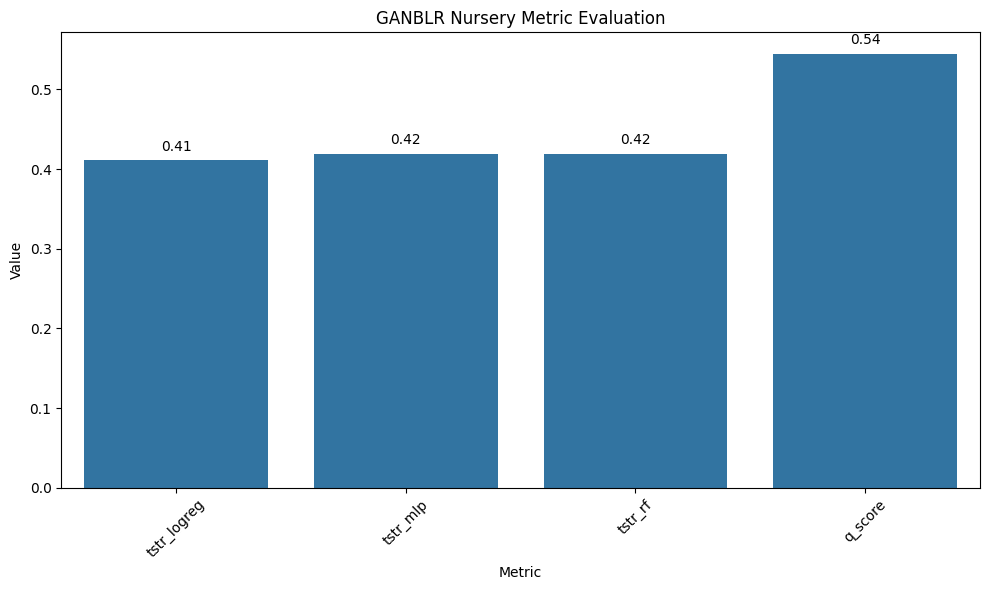

In [39]:
visualize_metrics(rg, title="GANBLR Nursery Metric Evaluation")

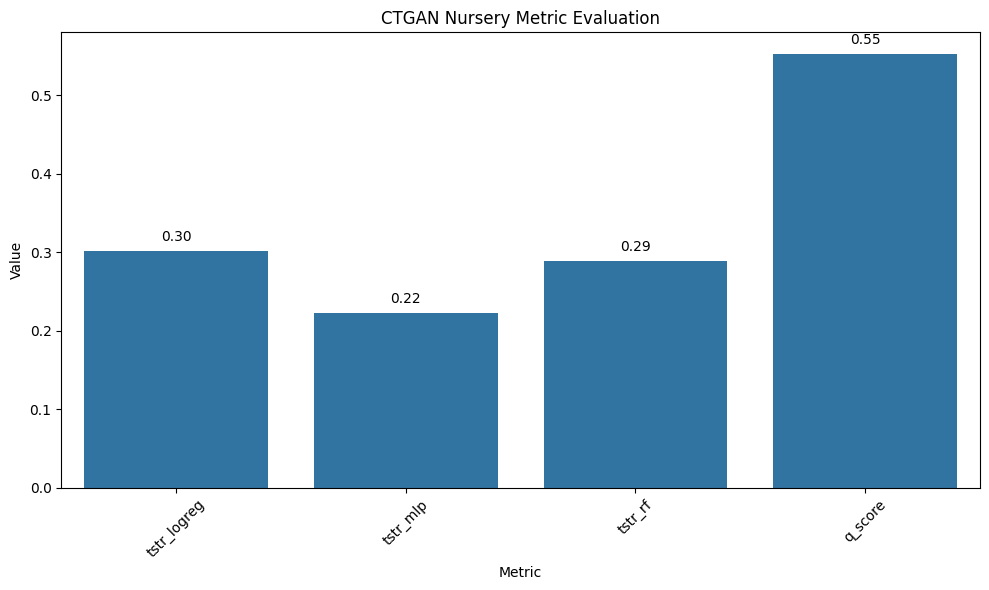

In [40]:
visualize_metrics(rc, title="CTGAN Nursery Metric Evaluation")

In [29]:
model_result = evaluate.evaluate_models(data, {"GANBLR": ganblr_model, "CTGAN": ctgan_model}, ['tstr_logreg', 'tstr_mlp', 'tstr_rf', 'q_score'])

[INFO] Generating data using GANBLR model
[SUCCESS] Data generation completed


In [ ]:
# model_result

In [31]:
# Future import statement ideas

import katabatic as kb
from katabatic.models import meg
from katabatic.models import ganblr
from katabatic.utils.evaluate import run_metric
from katabatic.utils.preprocessing import preprosessing_method1  # good place to store preprocessing utilities